# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow opencv-python mediapipe

   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   -----------------

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [ ]:
# import cv2
# import mediapipe as mp
# import numpy as np
# from collections import deque

# # === Mediapipe (Hands فقط) ===
# mp_hands   = mp.solutions.hands
# mp_drawing = mp.solutions.drawing_utils
# mp_styles  = mp.solutions.drawing_styles

# # ملاحظة: للفيديو نستخدم static_image_mode=False لتتبّع أفضل
# hands = mp_hands.Hands(
#     static_image_mode=False,
#     max_num_hands=1,                 # ثبّت يد واحدة لتثبيت طول المتجه = 42
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5
# )

# def mediapipe_detection(image, model):
#     """تحويل BGR→RGB، تشغيل الموديل، ثم RGB→BGR (نفس توقيعك)."""
#     imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     imgRGB.flags.writeable = False
#     results = model.process(imgRGB)          # results.multi_hand_landmarks
#     imgRGB.flags.writeable = True
#     image = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2BGR)
#     return image, results

# def draw_styled_landmarks(image, results):
#     """رسم اليد/الأيدي فقط."""
#     if results.multi_hand_landmarks:
#         for hand_lms in results.multi_hand_landmarks:
#             mp_drawing.draw_landmarks(
#                 image,
#                 hand_lms,
#                 mp_hands.HAND_CONNECTIONS,
#                 mp_styles.get_default_hand_landmarks_style(),
#                 mp_styles.get_default_hand_connections_style()
#             )

# def extract_hand_feats_42(image, results=None):
#     """
#     يُرجع متجه ميزات بطول 42: (x,y) مطبّعة داخل صندوق اليد،
#     مع صندوق الرسم bbox (x1,y1,x2,y2). يُرجع (None,None) إذا لا توجد يد.
#     """
#     H, W, _ = image.shape
#     if results is None:
#         _, results = mediapipe_detection(image, hands)

#     if not results.multi_hand_landmarks:
#         return None, None

#     hand = results.multi_hand_landmarks[0]   # يد واحدة فقط (لتثبيت الطول)
#     xs = [lm.x for lm in hand.landmark]
#     ys = [lm.y for lm in hand.landmark]

#     xmin, xmax = min(xs), max(xs)
#     ymin, ymax = min(ys), max(ys)
#     w = max(xmax - xmin, 1e-6)
#     h = max(ymax - ymin, 1e-6)

#     feats = []
#     for lm in hand.landmark:
#         nx = (lm.x - xmin) / w
#         ny = (lm.y - ymin) / h
#         feats.extend([nx, ny])               # 42 قيمة

#     bbox = (int(xmin * W) - 10, int(ymin * H) - 10,
#             int(xmax * W) + 10, int(ymax * H) + 10)

#     return np.array(feats, dtype=np.float32), bbox

# # ----------------------------
# # حلقة العرض (وتجهيز نافذة LSTM إن لزم)
# # ----------------------------
# cap = cv2.VideoCapture(0)   # جرّب 1 لو عندك كاميرا ثانية

# # إعداد نافذة انزلاقية للـ LSTM (اختياري)
# T = 30                      # طول التسلسل للـ LSTM
# window = deque(maxlen=T)

# # (اختياري) لو عندك موديل LSTM محفوظ:
# # import tensorflow as tf
# # lstm = tf.keras.models.load_model('hands_lstm.h5')
# # import pickle; meta = pickle.load(open('hands_lstm_labels.pkl','rb'))
# # CLASSES = meta['classes']; T = meta['T']  # تأكد أن T يطابق T هنا

# if not cap.isOpened():
#     raise RuntimeError("لم يتم فتح الكاميرا")

# while True:
#     ok, frame = cap.read()
#     if not ok:
#         break

#     image, results = mediapipe_detection(frame, hands)
#     draw_styled_landmarks(image, results)

#     feats42, bbox = extract_hand_feats_42(image, results)
#     if feats42 is not None:
#         window.append(feats42)

#         # رسم صندوق حول اليد
#         if bbox is not None:
#             x1, y1, x2, y2 = bbox
#             cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 0), 2)

#         # (اختياري) تنبؤ LSTM عندما تمتلئ النافذة:
#         # if len(window) == T:
#         #     X = np.expand_dims(np.array(window, dtype=np.float32), axis=0)  # (1,T,42)
#         #     probs = lstm.predict(X, verbose=0)[0]
#         #     idx   = int(np.argmax(probs))
#         #     label = CLASSES[idx]; conf = float(probs[idx])
#         #     cv2.putText(image, f'{label} ({conf:.2f})', (x1, y1-12),
#         #                 cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 2, cv2.LINE_AA)

#     cv2.imshow("Hands only (MP 0.10.x)", image)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# hands.close()
# cv2.destroyAllWindows()


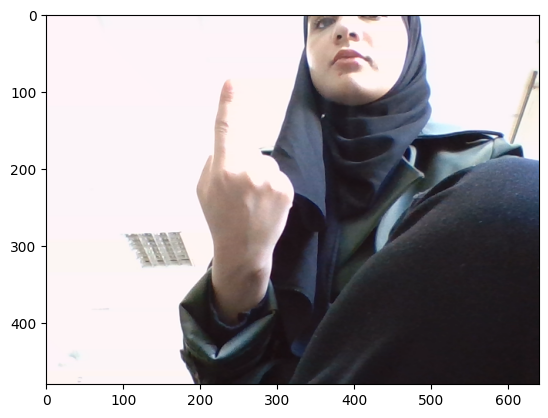

In [ ]:
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:
# # def extract_keypoints(results):
# #     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
# #     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
# #     lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# #     rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
# #     return np.concatenate([pose, face, lh, rh])
# def extract_keypoints(results):
#     # في حالة عدم وجود أي يد
#     if not results.multi_hand_landmarks:
#         return np.zeros(42)  # 21 نقطة × (x,y)

#     # استخدم أول يد فقط لتثبيت الطول
#     hand = results.multi_hand_landmarks[0]
#     xs = [lm.x for lm in hand.landmark]
#     ys = [lm.y for lm in hand.landmark]

#     xmin, xmax = min(xs), max(xs)
#     ymin, ymax = min(ys), max(ys)
#     w = max(xmax - xmin, 1e-6)
#     h = max(ymax - ymin, 1e-6)

#     # تطبيع الإحداثيات داخل صندوق اليد
#     normalized = []
#     for lm in hand.landmark:
#         normalized.extend([(lm.x - xmin) / w, (lm.y - ymin) / h])  # 42 قيمة

#     return np.array(normalized, dtype=np.float32)


In [ ]:
# result_test = extract_keypoints(results)
# np.save('0', result_test)
# # ثم
# np.load('0.npy')


array([0.48308682, 1.        , 0.16169877, 0.8559414 , 0.        ,
       0.64902467, 0.09527294, 0.47133756, 0.30716473, 0.40065444,
       0.25014096, 0.5466075 , 0.269723  , 0.265844  , 0.29904374,
       0.1150559 , 0.32028484, 0.        , 0.5454413 , 0.5593933 ,
       0.58153987, 0.38078073, 0.50831   , 0.45291868, 0.4546427 ,
       0.5313354 , 0.7991856 , 0.60286355, 0.7644272 , 0.45490515,
       0.70747817, 0.505908  , 0.6680333 , 0.5774868 , 1.        ,
       0.6506623 , 0.92094773, 0.52188087, 0.86566526, 0.57299083,
       0.84755546, 0.6383981 ], dtype=float32)

# 4. Setup Folders for Collection

In [ ]:
# # # Path for exported data, numpy arrays
# # DATA_PATH = os.path.join('MP_Data') 

# # # Actions that we try to detect
# # actions = np.array(['2', '7'])

# # # Thirty videos worth of data
# # no_sequences = 30

# # # Videos are going to be 30 frames in length
# # sequence_length = 30
# # ============================
# # Path for exported data
# # ============================
# DATA_PATH = os.path.join('MP_Data', 'Alphabets')

# # ============================
# # Arabic Alphabet Actions
# # ============================
# actions = np.array([
#     'ا','ب','ت','ث','ج','ح','خ','د','ذ','ر','ز',
#     'س','ش','ص','ض','ط','ظ','ع','غ','ف','ق','ك',
#     'ل','م','ن','هـ','و','ي'
# ])

# # ============================
# # Number of sequences per letter
# # ============================
# no_sequences = 100     # عدد الفيديوهات لكل حرف
# sequence_length = 50  # عدد الفريمات بكل فيديو

# # ============================
# # Create folders for dataset
# # ============================
# for action in actions:
#     for sequence in range(no_sequences):
#         try:
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass


In [31]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [ ]:
# for action in actions: 
#     for sequence in range(no_sequences):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

تم إنشاء جميع المجلدات داخل MP_Data/alphabet بنجاح ✔️


# 5. Collect Keypoint Values for Training and Testing

In [ ]:
# # TARGET_FPS = 30
# # SECONDS_PER_SEQUENCE = 3           # زوّدها إذا بدك مدة أطول (مثلاً 5)
# # sequence_length = int(TARGET_FPS * SECONDS_PER_SEQUENCE)

# # cap = cv2.VideoCapture(0)

# # with mp_hands.Hands(
# #     static_image_mode=False,
# #     max_num_hands=1,
# #     min_detection_confidence=0.5,
# #     min_tracking_confidence=0.5
# # ) as hands:
# #     for action in actions:
# #         for sequence in range(no_sequences):
# #             for frame_num in range(sequence_length):
# #                 ret, frame = cap.read()
# #                 if not ret:
# #                     continue

# #                 image, results = mediapipe_detection(frame, hands)
# #                 draw_styled_landmarks(image, results)

# #                 if frame_num == 0:
# #                     cv2.putText(image, 'STARTING COLLECTION', (120,200),
# #                                 cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
# #                     cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12),
# #                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
# #                     cv2.imshow('OpenCV Feed', image)
# #                     cv2.waitKey(3000)  # استعداد 3 ثواني
# #                 else:
# #                     cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12),
# #                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
# #                     cv2.imshow('OpenCV Feed', image)

# #                 keypoints = extract_keypoints(results)
# #                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
# #                 np.save(npy_path, keypoints)

# #                 if cv2.waitKey(int(1000 / TARGET_FPS)) & 0xFF == ord('q'):
# #                     break

# # cap.release()
# # cv2.destroyAllWindows()
# TARGET_FPS = 30
# SECONDS_PER_SEQUENCE = 3
# sequence_length = int(TARGET_FPS * SECONDS_PER_SEQUENCE)

# cap = cv2.VideoCapture(0)

# with mp_hands.Hands(
#     static_image_mode=False,
#     max_num_hands=1,
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5
# ) as hands:
#     for action in actions:
#         for sequence in range(no_sequences):

#             print(f"\nجاهزة لتصوير الحرف: {action} | الفيديو رقم {sequence}")
#             print("اضغط ENTER للبدء، SPACE لإيقاف مؤقت، ENTER للمتابعة، Q للخروج.")

#             # ننتظر دخول المستخدم
#             while True:
#                 key = cv2.waitKey(1) & 0xFF
#                 if key == 13:    # ENTER
#                     print("➡ بدأ التصوير...")
#                     break
#                 if key == ord('q'):
#                     cap.release()
#                     cv2.destroyAllWindows()
#                     raise SystemExit("تم الإنهاء بناءً على طلبك.")

#             frame_num = 0
#             paused = False

#             while frame_num < sequence_length:
#                 if paused:
#                     key = cv2.waitKey(1) & 0xFF
#                     if key == 13:  # ENTER → رجوع
#                         paused = False
#                         print("▶️ تمت المتابعة")
#                     elif key == ord('q'):
#                         cap.release()
#                         cv2.destroyAllWindows()
#                         raise SystemExit("تم الإنهاء.")
#                     continue

#                 ret, frame = cap.read()
#                 if not ret:
#                     continue

#                 image, results = mediapipe_detection(frame, hands)
#                 draw_styled_landmarks(image, results)

#                 cv2.putText(
#                     image,
#                     f'{action} | Video {sequence} | Frame {frame_num}/{sequence_length}',
#                     (10, 20),
#                     cv2.FONT_HERSHEY_SIMPLEX,
#                     0.6,
#                     (0, 0, 255),
#                     2,
#                     cv2.LINE_AA
#                 )

#                 cv2.imshow('OpenCV Feed', image)

#                 # حفظ البيانات
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # مفاتيح التحكم
#                 key = cv2.waitKey(int(1000 / TARGET_FPS)) & 0xFF
#                 if key == ord('q'):
#                     cap.release()
#                     cv2.destroyAllWindows()
#                     raise SystemExit("تم الإنهاء.")
#                 elif key == 32:  # space
#                     paused = True
#                     print("⏸ تم الإيقاف المؤقت... اضغطي ENTER للمتابعة")
                
#                 frame_num += 1

# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# cap.release()
# cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
# label_map = {label:num for num, label in enumerate(actions)}
import numpy as np

actions = np.array([
    'ا','ب','ت','ث','ج','ح','خ','د','ذ','ر','ز',
    'س','ش','ص','ض','ط','ظ','ع','غ','ف','ق','ك',
    'ل','م','ن','هـ','و','ي'
])

label_map = {label: idx for idx, label in enumerate(actions)}
label_map


{'ا': 0,
 'ب': 1,
 'ت': 2,
 'ث': 3,
 'ج': 4,
 'ح': 5,
 'خ': 6,
 'د': 7,
 'ذ': 8,
 'ر': 9,
 'ز': 10,
 'س': 11,
 'ش': 12,
 'ص': 13,
 'ض': 14,
 'ط': 15,
 'ظ': 16,
 'ع': 17,
 'غ': 18,
 'ف': 19,
 'ق': 20,
 'ك': 21,
 'ل': 22,
 'م': 23,
 'ن': 24,
 'هـ': 25,
 'و': 26,
 'ي': 27}

In [4]:
label_map

{'ا': 0,
 'ب': 1,
 'ت': 2,
 'ث': 3,
 'ج': 4,
 'ح': 5,
 'خ': 6,
 'د': 7,
 'ذ': 8,
 'ر': 9,
 'ز': 10,
 'س': 11,
 'ش': 12,
 'ص': 13,
 'ض': 14,
 'ط': 15,
 'ظ': 16,
 'ع': 17,
 'غ': 18,
 'ف': 19,
 'ق': 20,
 'ك': 21,
 'ل': 22,
 'م': 23,
 'ن': 24,
 'هـ': 25,
 'و': 26,
 'ي': 27}

In [49]:
import os
import numpy as np

DATA_PATH = 'MP_Data/Alphabets'

# بدل الحروف → 0…27
actions = [str(i) for i in range(28)]

# عدد الفيديوهات لكل حرف
no_sequences = 100     # حسب دمج البنات
sequence_length = 90   # حسب التصوير

# خريطة labels
label_map = {label: int(label) for label in actions}

sequences, labels = [], []

for action in actions:
    for sequence in range(no_sequences):
        window = []
        valid = True

        for frame_num in range(sequence_length):

            path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")

            if not os.path.exists(path):
                print(f"⚠️ Missing frame: {path}")
                valid = False
                break

            res = np.load(path)
            window.append(res)

        if valid:
            sequences.append(window)
            labels.append(label_map[action])


⚠️ Missing frame: MP_Data/Alphabets\3\73\0.npy
⚠️ Missing frame: MP_Data/Alphabets\3\74\0.npy


In [50]:
np.array(sequences).shape

(2798, 90, 42)

In [51]:
np.array(labels).shape

(2798,)

In [52]:
X = np.array(sequences)

In [53]:
X.shape

(2798, 90, 42)

In [54]:
y = to_categorical(labels).astype(int)

In [25]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [59]:
y_train.shape

(2238, 28)

# 7. Build and Train LSTM Neural Network

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [62]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [63]:
model = Sequential()

# LSTM Layers
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(90, 42)))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))

# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(28, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 90, 128)           87552     
                                                                 
 lstm_6 (LSTM)               (None, 90, 256)           394240    
                                                                 
 lstm_7 (LSTM)               (None, 128)               197120    
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 28)               

In [64]:
# res = [.7, 0.2, 0.1]
print(X_train.shape)
print(y_train.shape)


(2238, 90, 42)
(2238, 28)


In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras import backend as K

# تنظيف أي موديل سابق
K.clear_session()

# الأبعاد من الداتا (بدون أخطاء)
TIMESTEPS   = X_train.shape[1]     # 90
FEAT_DIM    = X_train.shape[2]     # 42
NUM_CLASSES = y_train.shape[1]     # 28

# بناء الموديل
model = Sequential()

model.add(Input(shape=(TIMESTEPS, FEAT_DIM)))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(NUM_CLASSES, activation='softmax'))

# تجميع الموديل
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 256)           306176    
                                                                 
 dropout (Dropout)           (None, 90, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 28)                3

In [66]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# لو y_train one-hot حوله لأرقام
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_fixed = np.argmax(y_train, axis=1)
else:
    y_train_fixed = y_train

# حساب class weight
classes = np.unique(y_train_fixed)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_fixed
)

class_weights = dict(zip(classes, class_weights))
print(class_weights)


{0: 1.0516917293233083, 1: 1.0247252747252746, 2: 1.0380333951762524, 3: 1.011754068716094, 4: 0.9991071428571429, 5: 1.0247252747252746, 6: 1.0247252747252746, 7: 1.0247252747252746, 8: 1.0657142857142856, 9: 1.0516917293233083, 10: 0.9403361344537815, 11: 1.0657142857142856, 12: 0.9867724867724867, 13: 0.9991071428571429, 14: 0.9747386759581882, 15: 0.9082792207792207, 16: 0.9747386759581882, 17: 0.9867724867724867, 18: 1.0657142857142856, 19: 1.011754068716094, 20: 0.9629948364888123, 21: 0.9294019933554817, 22: 0.9991071428571429, 23: 0.9991071428571429, 24: 0.9629948364888123, 25: 0.9867724867724867, 26: 0.9991071428571429, 27: 0.9747386759581882}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
import datetime

# ===== TensorBoard (اختياري بس مفيد جداً) =====
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = TensorBoard(log_dir=log_dir)

# ===== Early Stopping =====
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# ===== Learning Rate Scheduler =====
reduce_lr  = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-6
)

# ===== Training =====
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tb_callback, early_stop, reduce_lr],
    verbose=1,
    class_weight=class_weights
)


Epoch 1/500
56/56 [==============================] - 302s 5s/step - loss: 3.2936 - accuracy: 0.0592 - val_loss: 3.1252 - val_accuracy: 0.1317 - lr: 5.0000e-04
Epoch 2/500
56/56 [==============================] - 318s 6s/step - loss: 2.7950 - accuracy: 0.1637 - val_loss: 2.6298 - val_accuracy: 0.2121 - lr: 5.0000e-04
Epoch 3/500
56/56 [==============================] - 354s 6s/step - loss: 2.1367 - accuracy: 0.2804 - val_loss: 1.8388 - val_accuracy: 0.3460 - lr: 5.0000e-04
Epoch 4/500
56/56 [==============================] - 369s 7s/step - loss: 1.6314 - accuracy: 0.4073 - val_loss: 1.5999 - val_accuracy: 0.4152 - lr: 5.0000e-04
Epoch 5/500
56/56 [==============================] - 392s 7s/step - loss: 1.5319 - accuracy: 0.4536 - val_loss: 1.2334 - val_accuracy: 0.5424 - lr: 5.0000e-04
Epoch 6/500
56/56 [==============================] - 351s 6s/step - loss: 1.3636 - accuracy: 0.5000 - val_loss: 1.0617 - val_accuracy: 0.6406 - lr: 5.0000e-04
Epoch 7/500
56/56 [===========================

# 8. Make Predictions

In [ ]:
# res = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 633ms/step


# 9. Save Weights

In [ ]:
model.save('action_f1.h5')

In [23]:
del model

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('action_f1.h5')


# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
# from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
# yhat = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 481ms/step


In [ ]:
# ytrue = np.argmax(y_test, axis=1).tolist()
# yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
# multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 2]],

       [[2, 0],
        [0, 1]]], dtype=int64)

In [ ]:
# accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [29]:
import random
import cv2
import numpy as np

# توليد ألوان بعدد الأحرف (28)
colors = [(random.randint(50,255), random.randint(50,255), random.randint(50,255)) 
          for _ in range(len(actions))]

def prob_viz(res, actions, input_frame, colors, bbox=None):
    output_frame = input_frame.copy()

    # ======================
    # 1) رسم احتمالات أعلى 5
    # ======================
    top_indices = np.argsort(res)[-5:][::-1]

    for idx, action_i in enumerate(top_indices):
        prob  = res[action_i]
        color = colors[action_i]

        cv2.rectangle(output_frame,
                      (0, 60 + idx * 40),
                      (int(prob * 300), 90 + idx * 40),
                      color,
                      -1)

        cv2.putText(output_frame,
                    f"{actions[action_i]}: {prob:.2f}",
                    (10, 85 + idx * 40),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.8,
                    (255,255,255),
                    2,
                    cv2.LINE_AA)

    # ======================
    # 2) رسم مربع حول اليد
    # ======================
    if bbox is not None:
        x1, y1, x2, y2 = bbox
        cv2.rectangle(output_frame, (x1, y1), (x2, y2), (0,255,0), 3)

        # أعلا المربع نكتب الحرف
        main_pred = actions[np.argmax(res)]
        cv2.putText(output_frame,
                    main_pred,
                    (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.2,
                    (0,255,0),
                    3,
                    cv2.LINE_AA)

    return output_frame


In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# ================================
# 1) Load Model
# ================================
model = load_model('action_f1.h5')

# ================================
# 2) Labels (28 letters)
# ================================
actions = np.array([
    'a', 'b', 't', 'th', 'j', '7', 'kh', 'd', 'dh', 'r', 'z',
    's', 'sh', 'sad', 'dad', 'tah', 'zah', '3', 'gh', 'f', 'q',
    'k', 'l', 'm', 'n', 'h', 'w', 'y'
])

# ================================
# 3) Mediapipe setup
# ================================
mp_hands   = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_styles  = mp.solutions.drawing_styles

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# ================================
# 4) Extract 42 normalized features
# ================================
def extract_keypoints(results):
    if not results.multi_hand_landmarks:
        return np.zeros(42)

    hand = results.multi_hand_landmarks[0]
    xs = [lm.x for lm in hand.landmark]
    ys = [lm.y for lm in hand.landmark]

    xmin, xmax = min(xs), max(xs)
    ymin, ymax = min(ys), max(ys)
    w = max(xmax - xmin, 1e-6)
    h = max(ymax - ymin, 1e-6)

    norm = []
    for lm in hand.landmark:
        norm.extend([(lm.x - xmin) / w, (lm.y - ymin) / h])

    return np.array(norm, dtype=np.float32)

# ================================
# 5) Draw hand landmarks
# ================================
def mediapipe_detection(image, model):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model.process(img)
    return image, results

def draw_landmarks(image, results):
    if results.multi_hand_landmarks:
        for hand in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, hand, mp_hands.HAND_CONNECTIONS,
                mp_styles.get_default_hand_landmarks_style(),
                mp_styles.get_default_hand_connections_style()
            )

# ================================
# 6) Probability bars (Top-5 only)
# ================================
colors = [tuple(np.random.randint(50,255,3).tolist()) for _ in range(len(actions))]

def prob_viz(res, actions, image):
    output = image.copy()

    top_idx = np.argsort(res)[-5:][::-1]  # Top 5

    for i, idx in enumerate(top_idx):
        prob = res[idx]
        color = colors[idx]

        cv2.rectangle(
            output, (0, 60+i*40),
            (int(prob*300), 95+i*40),
            color, -1
        )

        cv2.putText(
            output,
            f"{actions[idx]} {prob:.2f}",
            (10, 90+i*40),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255,255,255), 2
        )

    return output

# ================================
# 7) LSTM window
# ================================
SEQ_LEN = 90
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)

# ================================
# 8) Main loop
# ================================
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    H, W, _ = frame.shape

    image, results = mediapipe_detection(frame, hands)
    draw_landmarks(image, results)

    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-SEQ_LEN:]

    # Detect bounding box
    if results.multi_hand_landmarks:
        hand = results.multi_hand_landmarks[0]
        xs = [lm.x for lm in hand.landmark]
        ys = [lm.y for lm in hand.landmark]

        x1 = int(min(xs) * W) - 20
        y1 = int(min(ys) * H) - 20
        x2 = int(max(xs) * W) + 20
        y2 = int(max(ys) * H) + 20
    else:
        x1=y1=x2=y2 = 0

    # Prediction
    if len(sequence) == SEQ_LEN:
        res = model.predict(
            np.expand_dims(sequence, axis=0),
            verbose=0
        )[0]

        pred = actions[np.argmax(res)]

        if res[np.argmax(res)] > threshold:
            if len(sentence) == 0 or pred != sentence[-1]:
                sentence.append(pred)

            if len(sentence) > 5:
                sentence = sentence[-5:]

        image = prob_viz(res, actions, image)

        # ======= draw box + label above it =======
        cv2.rectangle(image, (x1, y1-40), (x2, y1), (0,0,0), -1)
        cv2.putText(
            image, pred,
            (x1+10, y1-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.2, (255,255,255), 3
        )
        cv2.rectangle(image, (x1, y1), (x2, y2), (0,0,0), 3)

    # Show sentence on top
    cv2.rectangle(image, (0,0), (640,40), (0,0,0), -1)
    cv2.putText(image, ' '.join(sentence), (10,30),
                cv2.FONT_HERSHEY_SIMPLEX, 1,
                (255,255,255), 2)

    cv2.imshow("Sign Detection", image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [32]:
# تقييم الموديل على بيانات التدريب
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"✅ Training Accuracy: {train_acc * 100:.2f}%")

# تقييم الموديل على بيانات الاختبار
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Testing Accuracy: {test_acc * 100:.2f}%")


✅ Training Accuracy: 99.74%
✅ Testing Accuracy: 100.00%


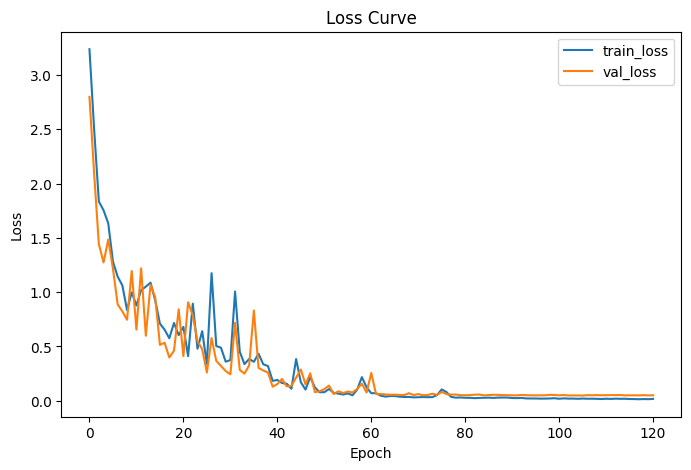

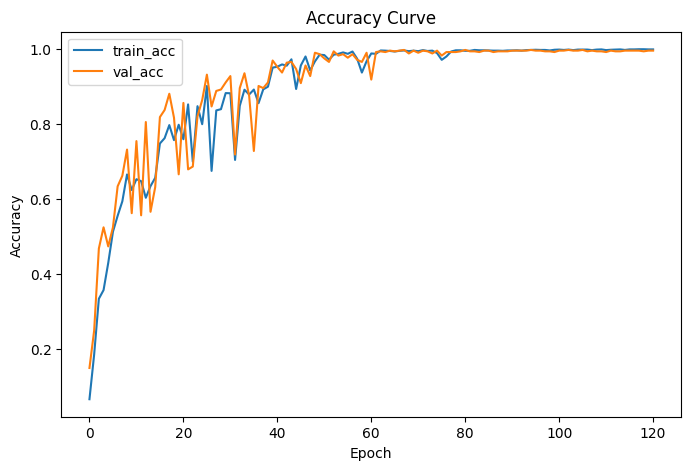

In [36]:
import matplotlib.pyplot as plt

# Loss curve
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy curve
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
